<a href="https://colab.research.google.com/github/Francisco2963/EXAMEN-3/blob/main/Examen_3__Francisco_Barrios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descripción

# Versión D: Fundamentos de Data Science

Analizando las Elecciones de 2024 en India

## Limpieza de datos con Python:

Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.

 Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Party’, ‘party’, ‘PARTY’).

Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un número de votos mayor al total de votantes).

## Exploración de datos con Python:

Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

## Análisis adicional:

Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

Análisis de correlación: Identifica y analiza las correlaciones más fuertes entre las variables del dataset.

Modelado predictivo: Utiliza un modelo de clasificación para predecir el resultado de las elecciones en función de las características disponibles en el dataset.

## Entrega:

Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 5 visualizaciones.

Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

*NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('/content/election_results_2024.csv')
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [8]:
df.tail()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared
542,Zahirabad,5,SURESH KUMAR SHETKAR,Indian National Congress,B. B. PATIL,Bharatiya Janata Party,46188,Result Declared


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Const. No.,543.0,18.178637,16.42784,1.0,6.0,14.0,25.0,80.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


COMENTARIO:

la informacion que empezaremos a analizar corresponde a las Elecciones Generales de la India de 2024 (considerada la mas grande del mundo), esta elecciones se celebraron entre el 19 de abril hasta el 1 de junio para elejir 543 miembros del Lok Sabha ( camara baja del parlamento de la India)

Podemos ver que al parecer nuestro DataFrame  en la columna Constituency esta ordenado de forma alfabetica,(lo detectamos en head( ) y tail( ).

Tambien nos percatamos que los nombres de la circunscripcion parlamentaria ( columna constituency) se encuentra con m,ayusculas y munusculas (datos a ordenar)

Que el DataFrame tiene una sola columna al aplicar describe( ) (dato a verificar tambien)

Al aplicar un .imfo( ) nos indica que el dataFrame tiene 543 entradas del 0 al 543 ( dato que concuerda con el distrito electoral), a primera vista existirian valores nulos en las columnas Trailing Candidate y Trailing Party ( a explorar).

Y la columna Margin su Dtype es un object lo que tambien vamos a revisar.





In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
Constituency,0
Const. No.,0
Leading Candidate,0
Leading Party,0
Trailing Candidate,1
Trailing Party,1
Margin,0
Status,0


Iniciamos la exploracion de las columnas que indican valores Nulos para analizar si es posible incluir alguna de las tecnicas de rellenado de NaN o tal vez no sea recomendable eliminar el NaN ya que puede ser un dato valido porque esta relacionado con nombres de candidatos,en este caso el que salio segundo, tercero o ultimo ya que la columna indica que se trata del candidato resagado

In [13]:
df['Trailing Candidate'].sort_values()

,Trailing Candidate
398,A NAMASSIVAYAM
399,A VIJAYARAGHAVAN
13,A. M ARIFF
333,AAKASH KUMAR SINGH
90,ABDHESH KUMAR ROY
...,...
182,YADVENDRA RAO DESHRAJ SINGH
218,YAMINI GOMAR
358,YAMINI YASHWANT JADHAV
441,YASHASWINI SAHAY


Al aplicar la funcion sort_values podemos ver que el la fila 493 encontramos nuestro NaN.

Y buscamos si existe alguna relacion con las otras columnas del dataFrame

In [152]:
df['Constituency'].value_counts()

,count
Constituency,
Maharajganj,2
Aurangabad,2
NAGAUR,1
Munger,1
Murshidabad,1
...,...
Fatehgarh Sahib,1
Farrukhabad,1
Faridkot,1


In [153]:
df['Leading Party'].value_counts()

,count
Leading Party,
Bharatiya Janata Party,240
Indian National Congress,99
Samajwadi Party,37
All India Trinamool Congress,29
Dravida Munnetra Kazhagam,22
Telugu Desam,16
Janata Dal (United),12
Shiv Sena (Uddhav Balasaheb Thackrey),9
Nationalist Congress Party – Sharadchandra Pawar,8


In [154]:
df['Trailing Candidate'].value_counts()

,count
Trailing Candidate,
RAMCHANDRA CHOUDHARY,1
MIHIR CHANDRAKANT KOTECHA,1
DR CHUMBEN MURRY,1
PRADEEP KUMAR MAJHI,1
DR MURUGAN L,1
...,...
DR. NAVAL KISHOR SHAKYA,1
KARAMJIT SINGH ANMOL,1
LALLU SINGH,1


In [17]:
df['Trailing Party'].nunique()

42

In [18]:
df['Trailing Party'].value_counts()

,count
Trailing Party,
Indian National Congress,167
Bharatiya Janata Party,153
All India Anna Dravida Munnetra Kazhagam,24
Samajwadi Party,24
Biju Janata Dal,21
Yuvajana Sramika Rythu Congress Party,21
Rashtriya Janata Dal,18
Communist Party of India (Marxist),17
All India Trinamool Congress,13


creamos un filtro con Loc para poder ubicar el NaN en nuestro DataFrame

In [155]:
filt_nul = df.loc[490:496]
filt_nul

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
490,Sultanpur,38,RAMBHUAL NISHAD,Samajwadi Party,MANEKA SANJAY GANDHI,Bharatiya Janata Party,43174,Result Declared
491,Sundargarh,2,JUAL ORAM,Bharatiya Janata Party,DILIP KUMAR TIRKEY,Biju Janata Dal,138808,Result Declared
492,Supaul,8,DILESHWAR KAMAIT,Janata Dal (United),CHANDRAHAS CHAUPAL,Rashtriya Janata Dal,169803,Result Declared
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,0,Uncontested
494,Surendranagar,9,CHANDUBHAI CHHAGANBHAI SHIHORA,Bharatiya Janata Party,RUTVIKBHAI LAVJIBHAI MAKWANA,Indian National Congress,261617,Result Declared
495,TENKASI,37,DR RANI SRI KUMAR,Dravida Munnetra Kazhagam,DR K KRISHNASAMY,All India Anna Dravida Munnetra Kazhagam,196199,Result Declared
496,THANJAVUR,30,MURASOLI S,Dravida Munnetra Kazhagam,SIVANESAN P,Desiya Murpokku Dravida Kazhagam,319583,Result Declared


# NOTA

Al realizar la exploracion, encontramos que este dato es unico, ya que tiene que ver con el nombre de los candidatos,por lo tanto no se puede ocupar ninguna tecnica de eliminacion de Nan ya que desconosco el nombre del candidato y el patido a que pertenece, ademas es imprtante destacar que la columna Status indica 'Uncontested'( inconstestado) lo que siguiere que este dato ' NO HA TENIDO OPOSICION' ya que segun la RAE incontestado significa que 'no se ha tenido respuesta' o 'que no ha tenido constastacion ( 'polemica', 'oposicion' )
definicion RAE : https://dle.rae.es/incontestado?m=form

Por lo tanto a mi parecer este es un dato valido y no corresponde eliminarlo, esta decision aplica tanto para la columna trailing Candidate y la Columna Trailing Party

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    int64 
 7   Status              543 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.1+ KB


Analizaremos nuestras columnas categoricas para ver si el Dtype corresponde o no

In [157]:
df['Margin'].sort_values()

,Margin
493,0
357,48
40,684
236,1587
226,1615
...,...
186,744716
384,773551
525,821408
157,1012476


In [158]:
df.Margin.dtype

dtype('int64')

# NOTA

Podemos ver que la columna Marge, que corresponde a la diferencia de votos del candidato ganador se encuentra como object, vamos a cambiarlo a int64.

Al ejecutar el metodo replace, me indica el siguiente error : Error: invalid literal for int() with base 10: '-'"
lo que indica que en parte de la cadena tiene agregado el siguiente simbolo - , por lo tanto no se podia comvertir la cadena a numero,.

es por eso que al codigo original se le agrega un nuevo str.replace para eliminar el caracter - y poder convertir la cadena a entero

In [167]:
df['Margin'] = df['Margin'].astype(str)
df['Margin'] = df['Margin'].str.replace('-','')
df['Margin'] = df['Margin'].astype(int)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    int64 
 7   Status              543 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.1+ KB


Seguiremos analizando nuestras columnas para ver si encontramos inconsistencias en los valores categoricos.

Como podemos ver en nuestra columna Constituency, si bien no hay valores repetidos , algunos datos se encuentran en mayusculas y otros en minusculas.

Com esta columna tiene relacion a al circunscripcion parlamentaria no es relevante que los nombres se encuentren se encuentren en mayusculas o minusculas, sin embargo los dejaremos todos en mayusculas

In [169]:
df['Constituency'].value_counts().tail(15)

,count
Constituency,
Gandhinagar,1
Gadchiroli - Chimur,1
GWALIOR,1
GURGAON,1
GUNA,1
GANGANAGAR,1
Firozpur,1
Firozabad,1
Fatehpur Sikri,1


In [170]:
df['Constituency'].str.upper()

,Constituency
0,AJMER
1,ALWAR
2,AMBALA
3,ANANTNAG-RAJOURI
4,ARAKKONAM
...,...
538,WARDHA
539,WAYANAD
540,WEST DELHI
541,YAVATMAL- WASHIM


NOTA:
primera columna con todos sus nombres en MAYUSCULAS

In [171]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [172]:
df['Leading Candidate'].value_counts()

,count
Leading Candidate,
RAHUL GANDHI,2
BHAGIRATH CHOUDHARY,1
RAJ BHUSHAN CHOUDHARY,1
ARVIND GANPAT SAWANT,1
ANIL YESHWANT DESAI,1
...,...
MUKESH RAJPUT,1
SARABJEET SINGH KHALSA,1
AWADHESH PRASAD,1


In [173]:
df['Leading Candidate'].str.upper()

,Leading Candidate
0,BHAGIRATH CHOUDHARY
1,BHUPENDER YADAV
2,VARUN CHAUDHRY
3,MIAN ALTAF AHMAD
4,S JAGATHRATCHAKAN
...,...
538,AMAR SHARADRAO KALE
539,RAHUL GANDHI
540,KAMALJEET SEHRAWAT
541,SANJAY UTTAMRAO DESHMUKH


In [174]:
df['Leading Party'].unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Jammu & Kashmir National Conference', 'Dravida Munnetra Kazhagam',
       'Nationalist Congress Party – Sharadchandra Pawar',
       'Communist Party of India (Marxist)', 'Telugu Desam',
       'Samajwadi Party', 'Aam Aadmi Party',
       'Yuvajana Sramika Rythu Congress Party',
       'All India Trinamool Congress',
       'Communist Party of India (Marxist-Leninist) (Liberation)',
       'Shiv Sena', 'Rashtriya Janata Dal', 'Bharat Adivasi Party',
       'Independent', 'Rashtriya Lok Dal', 'Janata Dal (United)',
       'Asom Gana Parishad', 'Shiromani Akali Dal',
       'Viduthalai Chiruthaigal Katch', 'Jharkhand Mukti Morcha',
       'Hindustani Awam Morcha (Secular)', 'AJSU Party',
       'Lok Janshakti Party(Ram Vilas)',
       'Shiv Sena (Uddhav Balasaheb Thackrey)',
       'All India Majlis-E-Ittehadul Muslimeen', 'Janasena Party',
       'United People’s Party, Liberal', 'Janata Dal (Secular)',
       'Revolut

La columna Leading Party se encuentran todos sus datos bien, por lo tanto no haremos ninguna modificacion a esta columna.

Sin embargo hay una fila donde se encuentra el partido politico AJSU Party, he decidido no cambiar este nombre ya que al revisar literatura en internet , el nombre se escribe tal cual (https://en.wikipedia.org/wiki/All_Jharkhand_Students_Union).
Pero si huboera renombrado el nombre del partido el codigo a utlizar seria el siguiente:

### df['Leading Party'] = df['Leading Party'].replace('AJSU Party', 'Ajsu Party')

In [175]:
df['Leading Party'].value_counts(ascending=False)

,count
Leading Party,
Bharatiya Janata Party,240
Indian National Congress,99
Samajwadi Party,37
All India Trinamool Congress,29
Dravida Munnetra Kazhagam,22
Telugu Desam,16
Janata Dal (United),12
Shiv Sena (Uddhav Balasaheb Thackrey),9
Nationalist Congress Party – Sharadchandra Pawar,8


In [176]:
df['Trailing Candidate'].value_counts(ascending=True)

,count
Trailing Candidate,
RAMCHANDRA CHOUDHARY,1
PRADEEP KUMAR MAJHI,1
DR MURUGAN L,1
TAMILMANI S,1
JYOTI MIRDHA,1
...,...
LALLU SINGH,1
MAHENDER PRATAP SINGH,1
DR RAM SHANKAR KATHERIA,1


In [177]:
df['Trailing Candidate'].unique()

array(['RAMCHANDRA CHOUDHARY', 'LALIT YADAV', 'BANTO KATARIA',
       'MEHBOOBA MUFTI', 'L VIJAYAN', 'GAJENDRAN, G.V.', 'ATHRAM SUGUNA',
       'SURESH CHAND KARDAM', 'HIMMATSINH PRAHLADSINH PATEL',
       'BHARAT YOGENDRA MAKWANA', 'DR. SUJAY RADHAKRISHNA VIKHEPATIL',
       'RAJARAM PAL', 'ABHAY KASHINATH PATIL', 'A. M ARIFF',
       'RAMYA HARIDAS', 'BIJENDRA SINGH', 'PRAKASH CHIK BARAIK',
       'NEERAJ TRIPATHI', 'PRADEEP TAMTA', 'RAPAKA VARAPRASADA RAO',
       'RITESH PANDEY', 'SMRITI IRANI', 'NAVNEET RAVI RANA',
       'JENNY THUMMAR', 'KULDEEP SINGH DHALIWAL', 'KUNWAR DANISH ALI',
       'BUDI MUTYALA NAIDU', 'AMIT CHAVDA', 'VIJAY INDER SINGLA',
       'MALAGUNDLA SANKAR NARAYANA', 'KULDEEP RAI SHARMA',
       'DHARMENDRA KASHYAP', 'KOTHAPALLI GEETHA', 'ARUP KANTI DIGAR',
       'SHAHNAWAZ', 'R. K. SINGH', 'BOSIRAM SIRAM', 'NABAM TUKI',
       'SURENDRAJEET SINGH AHLUWALIA', 'RANJITA SAHU', 'V JOY',
       'IMTIAZ JALEEL SYED', 'SUSHIL KUMAR SINGH',
       'DINESH LAL YADAV “N

In [178]:
df['Trailing Party'].unique()

array(['Indian National Congress', 'Bharatiya Janata Party',
       'Jammu & Kashmir Peoples Democratic Party',
       'All India Anna Dravida Munnetra Kazhagam', 'Samajwadi Party',
       'Communist Party of India (Marxist)',
       'All India Trinamool Congress',
       'Yuvajana Sramika Rythu Congress Party', 'Aam Aadmi Party',
       'Rashtriya Janata Dal', 'Biju Janata Dal',
       'All India Majlis-E-Ittehadul Muslimeen',
       'Jammu & Kashmir National Conference', 'Independent',
       'Nationalist Congress Party', 'Communist Party of India',
       'Shiv Sena (Uddhav Balasaheb Thackrey)',
       'Desiya Murpokku Dravida Kazhagam', 'Pattali Makkal Katch',
       'All India United Democratic Front', 'Assam Jatiya Parishad',
       'Suheldev Bharatiya Samaj Party', 'Jharkhand Mukti Morcha',
       'Vikassheel Insaan Party', 'Janata Dal (Secular)', 'Shiv Sena',
       'Bahujan Samaj Party', 'Janata Dal (United)', 'Telugu Desam',
       'Bharat Rashtra Samith',
       'Communist P

In [179]:
df['Status'].unique()

array(['Result Declared', 'Uncontested'], dtype=object)

# NOTA:

Todas las columnas con valores categoricos se encuentran revisadas

Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un número de votos mayor al total de votantes).

In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Const. No.,543.0,18.178637,16.427840,1.0,6.0,14.0,25.0,80.0
Margin,543.0,162051.095764,147291.707155,0.0,58607.0,121494.0,222765.0,1175092.0


Al cambiar el tipo de datos de la columna Margin de object a int64 ahora tenemos dos columnas con datos numericos

NOTA:

Al ejecutar describe( )nos muestra que hay 80 tipos de circuncripciones diferentes dentro de un unverso de 543 circunscripciones.
La diferencia de votos de los canndidaors ganadores y perdedores es significativa, en una circunscripcion el margen es de mas de un millon de votos, mientras que la media en todas las circunscripciones es de 162051 votos, la desviacion estandar de 147 291 votos de diferencia es muy alta, lo que indica que existe una gran variacion de votos entre las distintas circunscripciones, como por ejemplo en el percentil del 25% la diferencia es de solo 58607 votos comparados con los otros percentiles donde se puede ver que el margen de votos es mucho mayor


La desviación estándar del margen es bastante alta, lo que indica que existe una gran variabilidad en las ganancias entre los diferentes locales. Algunos locales tienen márgenes muy bajos, mientras que otros tienen márgenes muy altos.

# Exploración de datos con Python:

Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    int64 
 7   Status              543 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.1+ KB


In [182]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [183]:
df.sort_values(by='Leading Candidate',ascending=False)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
463,Sambhal,8,ZIA UR REHMAN,Samajwadi Party,PARMESHWAR LAL SAINI,Bharatiya Janata Party,121494,Result Declared
391,North-West Delhi,5,YOGENDER CHANDOLIYA,Bharatiya Janata Party,UDIT RAJ,Indian National Congress,290849,Result Declared
364,Mysore,21,YADUVEER KRISHNADATTA CHAMARAJA WADIYAR,Bharatiya Janata Party,M. LAKSHMANA,Indian National Congress,139262,Result Declared
269,Kadapa,21,Y. S. AVINASH REDDY,Yuvajana Sramika Rythu Congress Party,CHADIPIRALLA BHUPESH SUBBARAMI REDDY,Telugu Desam,62695,Result Declared
385,Nawada,39,VIVEK THAKUR,Bharatiya Janata Party,SHRAWAN KUMAR,Rashtriya Janata Dal,67670,Result Declared
...,...,...,...,...,...,...,...,...
159,Diamond harbour,21,ABHISHEK BANERJEE,All India Trinamool Congress,ABHIJIT DAS (BOBBY),Bharatiya Janata Party,710930,Result Declared
506,Tamluk,30,ABHIJIT GANGOPADHYAY,Bharatiya Janata Party,DEBANGSHU BHATTACHARYA,All India Trinamool Congress,77733,Result Declared
42,Aurangabad,37,ABHAY KUMAR SINHA,Rashtriya Janata Dal,SUSHIL KUMAR SINGH,Bharatiya Janata Party,79111,Result Declared
46,BARAMULLA,1,ABDUL RASHID SHEIKH,Independent,OMAR ABDULLAH,Jammu & Kashmir National Conference,204142,Result Declared


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
df_3 = df.groupby(['Leading Candidate'])[['Margin']].sum().reset_index()
df_3

,Leading Candidate,Margin
0,AASHTIKAR PATIL NAGESH BAPURAO,108602
1,ABDUL RASHID SHEIKH,204142
2,ABHAY KUMAR SINHA,79111
3,ABHIJIT GANGOPADHYAY,77733
4,ABHISHEK BANERJEE,710930
...,...,...
537,VIVEK THAKUR,67670
538,Y. S. AVINASH REDDY,62695
539,YADUVEER KRISHNADATTA CHAMARAJA WADIYAR,139262
540,YOGENDER CHANDOLIYA,290849


In [196]:
filtro_Candidato = df_3['Margin'] > 400000
df_8 = df_3[filtro_Candidato]
df_8

,Leading Candidate,Margin
4,ABHISHEK BANERJEE,710930
22,ALOK SHARMA,501499
27,AMIT SHAH,744716
60,ASHISH DUBEY,486674
102,BIPLAB KUMAR DEB,611578
106,BRIJMOHAN AGRAWAL,575285
108,C R PATIL,773551
132,DARSHAN SINGH CHOUDHARY,431696
165,DR. HEMANG JOSHI,582126
169,DR. LATA WANKHEDE,471222


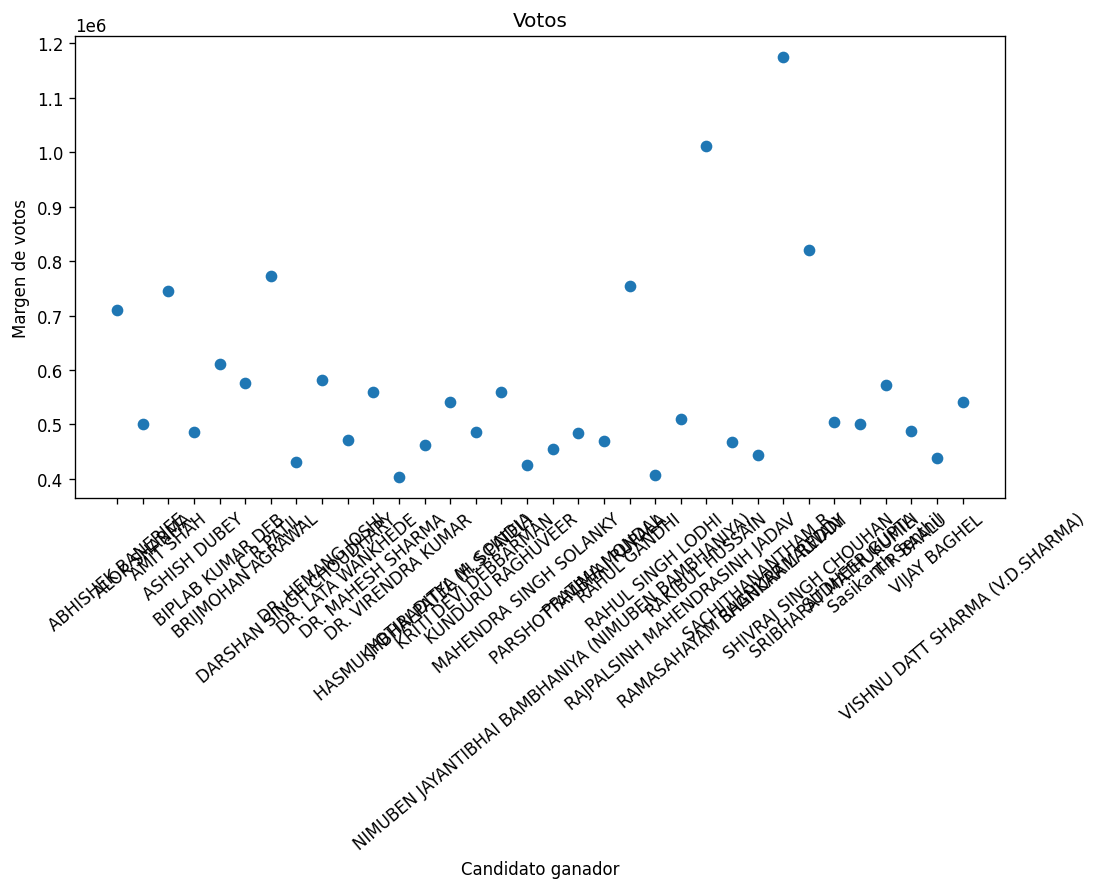

In [197]:
plt.figure(dpi=120,figsize=(10,5))
plt.scatter(df_8['Leading Candidate'],df_8['Margin'])
plt.xlabel('Candidato ganador'),
plt.ylabel('Margen de votos')
plt.title('Votos')
plt.xticks(rotation=40)
plt.grid(False)
plt.show()

En este grafico se intento mostrar un grafico de dispercion con los votos de los candidatos mayores a 700 mil, sin embargo no fue posible modificar la columna con los nombres de los candidatos

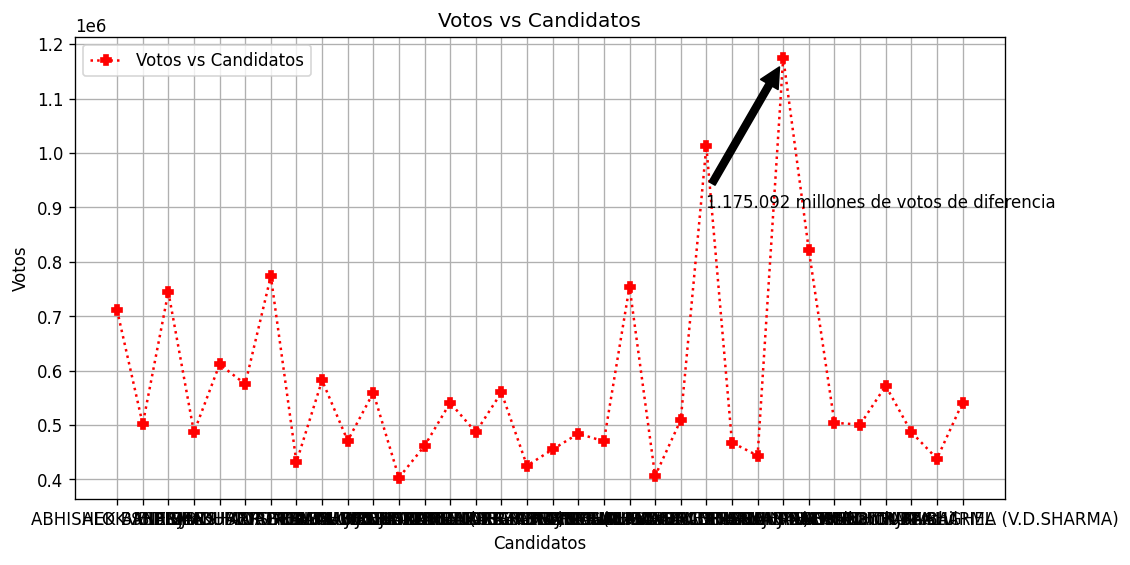

In [198]:
plt.figure(dpi=120,figsize=(10,5))
plt.plot(df_8['Leading Candidate'],df_8['Margin'],'rP:',label= 'Votos vs Candidatos')
plt.annotate('1.175.092 millones de votos de diferencia', xy=('SHANKAR LALWANI',1170000), xytext=('RAKIBUL HUSSAIN',900000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Candidatos')
plt.ylabel('Votos')
plt.title('Votos vs Candidatos')
plt.legend()
plt.grid(True)
plt.show()

En este grafico se muestran los 5 candidato con mayor cantidad de votos de diferencia con su competidor en las elecciones.

In [199]:
df['Constituency'].value_counts().reset_index()

,Constituency,count
0,Maharajganj,2
1,Aurangabad,2
2,NAGAUR,1
3,Munger,1
4,Murshidabad,1
...,...,...
536,Fatehgarh Sahib,1
537,Farrukhabad,1
538,Faridkot,1
539,Faizabad,1


In [200]:
gb_A1 = df.groupby('Constituency')['Margin'].sum().reset_index()
gb_A1

,Constituency,Margin
0,AJMER,329991
1,ALWAR,48282
2,AMBALA,49036
3,ANANTNAG-RAJOURI,281794
4,ARAKKONAM,306559
...,...,...
536,Wardha,81648
537,Wayanad,364422
538,West Delhi,199013
539,Yavatmal- Washim,94473


In [201]:
filtro_Circunscripcion = gb_A1['Margin'] > 750000
gb_A2 = gb_A1[filtro_Candidato]
gb_A2

<ipython-input-201-77d87a165184>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gb_A2 = gb_A1[filtro_Candidato]


,Constituency,Margin
4,ARAKKONAM,306559
22,Amravati,19731
27,Anand,89939
60,Baharampur,85022
102,Bidar,128875
106,Bishnupur,5567
108,Bolpur,327253
132,Chitradurga,48121
165,ERODE,236566
169,Etah,28052


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

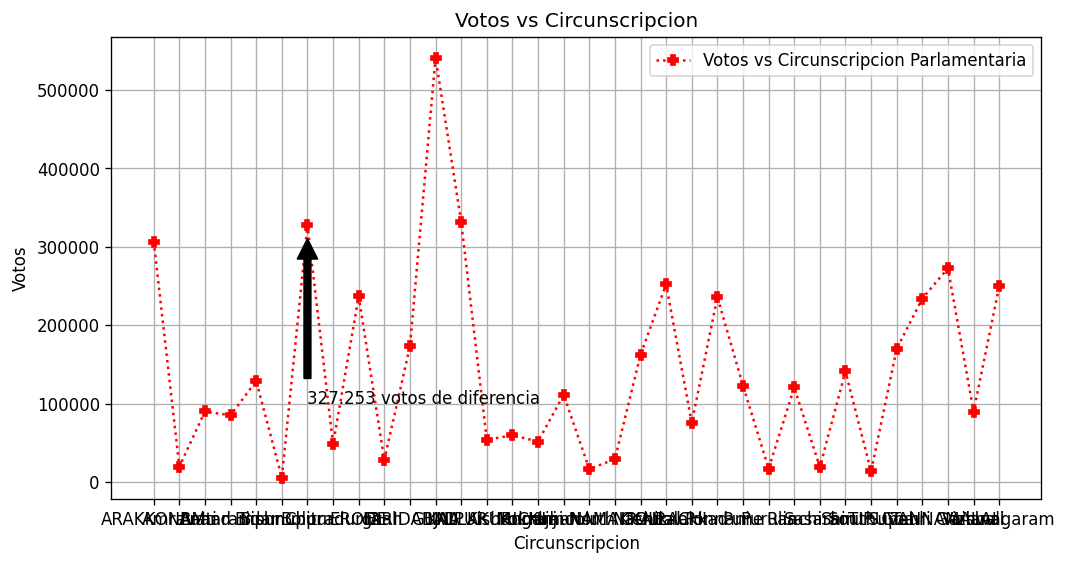

In [203]:
plt.figure(dpi=120,figsize=(10,5))
plt.plot(gb_A2['Constituency'],gb_A2['Margin'],'rP:',label= 'Votos vs Circunscripcion Parlamentaria')
plt.annotate('327.253 votos de diferencia', xy=('Bolpur',320000), xytext=('Bolpur',100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Circunscripcion')
plt.ylabel('Votos')
plt.title('Votos vs Circunscripcion')
plt.legend()
plt.grid(True)
plt.show()

Este grafico muestra los 5 distritos que obtuvieron la mayor diferencia de votacion entre sus candidatos.El distrito electoral de Bolpur fue el que obtuvo la mayor diferencia entre sus candidatos llegando a tener una diferencia de mas de 327 mil votos entre el candidato ganador y su competidor

In [204]:
df['Margin'].value_counts()

,count
Margin,
329991,1
48,1
212231,1
50984,1
87536,1
...,...
2678,1
70053,1
54567,1


In [205]:
df['Const. No.'].value_counts()

,count
Const. No.,
1,36
2,28
3,22
4,22
5,21
...,...
70,1
59,1
64,1


In [206]:
df['Leading Candidate'].value_counts()

,count
Leading Candidate,
RAHUL GANDHI,2
BHAGIRATH CHOUDHARY,1
RAJ BHUSHAN CHOUDHARY,1
ARVIND GANPAT SAWANT,1
ANIL YESHWANT DESAI,1
...,...
MUKESH RAJPUT,1
SARABJEET SINGH KHALSA,1
AWADHESH PRASAD,1


Despues de seleccionar las columnas las agruparemos para obtener un nuevo DataFrame y posterior a ello generaremos 4 filtros de candidatos y posterior a ello, concatenaremos estos filtros para intentar crear un grafico donde se muestren los votos obtenidos

In [207]:
df_2 = df.groupby(['Margin','Const. No.'])['Leading Candidate'].sum().sort_values(ascending=True)
df_2

,,Leading Candidate
Margin,Const. No.,
108602,15,AASHTIKAR PATIL NAGESH BAPURAO
204142,1,ABDUL RASHID SHEIKH
79111,37,ABHAY KUMAR SINHA
77733,30,ABHIJIT GANGOPADHYAY
710930,21,ABHISHEK BANERJEE
...,...,...
67670,39,VIVEK THAKUR
62695,21,Y. S. AVINASH REDDY
139262,21,YADUVEER KRISHNADATTA CHAMARAJA WADIYAR


Despues de crear un nuevo DataFrame con las columnas Margen, el numero unico de asignacion a cada circuncripcion y el candidato, generaremos los fitros de cada candidato.

In [208]:
flltro_c = df['Leading Candidate']== 'AASHTIKAR PATIL NAGESH BAPURAO'
df_AASHTIKAR_PATIL_NAGESH_BAPURAO = df[flltro_c]
df_AASHTIKAR_PATIL_NAGESH_BAPURAO

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
216,Hingoli,15,AASHTIKAR PATIL NAGESH BAPURAO,Shiv Sena (Uddhav Balasaheb Thackrey),BABURAO KADAM KOHALIKAR,Shiv Sena,108602,Result Declared


In [209]:
filtro_d = df['Leading Candidate']== 'RAHUL GANDHI'
df_RAHUL_GANDHI = df[filtro_d]
df_RAHUL_GANDHI

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared


In [210]:
filtro_e = df['Leading Candidate']== 'NARENDRA MODI'
df_NARENDRA_MODI = df[filtro_e]
df_NARENDRA_MODI

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
533,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,Result Declared


In [211]:
filtro_f = df['Leading Candidate']== 'AMIT SHAH'
df_AMIT_SHAH = df[filtro_f]
df_AMIT_SHAH

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,Result Declared


Una vez creados los filtros de los 4 candidatos elegidos, crearemos un nuevo DataFrame concatenando los 4 filtros desarrollados anteriormente

In [212]:
df.filtro_total = pd.concat([df_AASHTIKAR_PATIL_NAGESH_BAPURAO,df_RAHUL_GANDHI,df_NARENDRA_MODI,df_AMIT_SHAH])
df.filtro_total

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
216,Hingoli,15,AASHTIKAR PATIL NAGESH BAPURAO,Shiv Sena (Uddhav Balasaheb Thackrey),BABURAO KADAM KOHALIKAR,Shiv Sena,108602,Result Declared
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
533,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,Result Declared
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,Result Declared


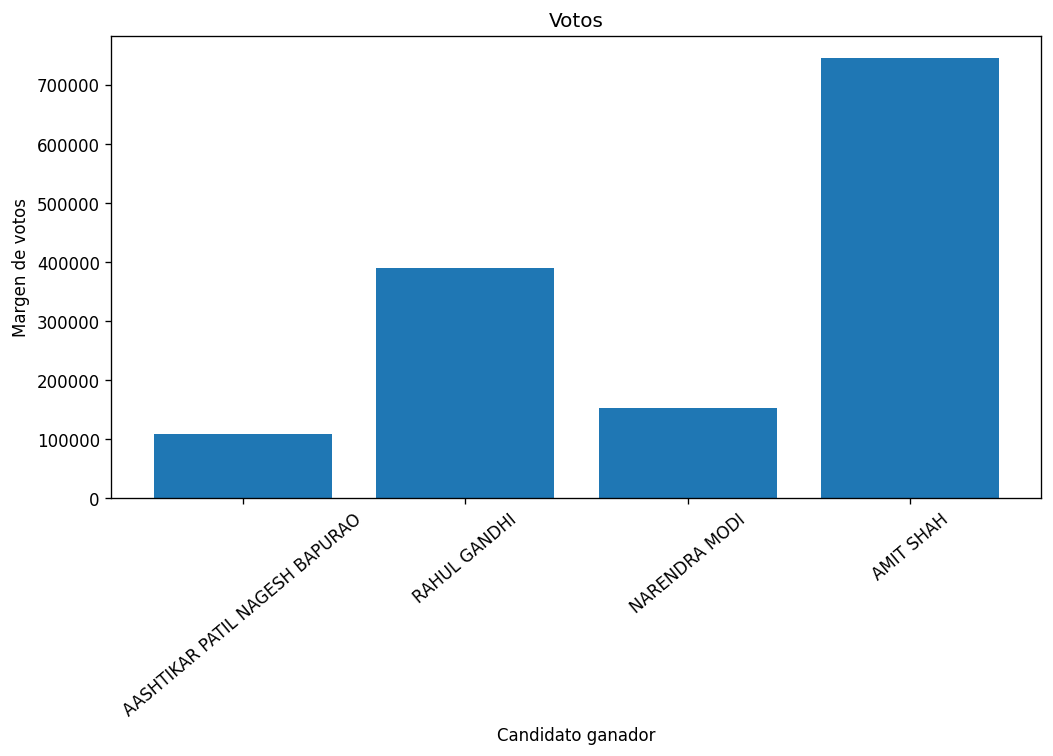

In [213]:
import matplotlib.pyplot as plt
plt.figure(dpi = 120,figsize=(10,5))
plt.bar(df.filtro_total['Leading Candidate'],df.filtro_total['Margin'])
plt.xlabel('Candidato ganador')
plt.ylabel('Margen de votos')
plt.title('Votos')
plt.xticks(rotation=40)
plt.show()

Este grafico muestra la cantidad de votos obtenidos por estos candidatos.
Lamentablemnte no pude bajar la escala de los nombres de los candidatos para que el grafico se pudiera ver mejor. Creo que deberia haber bajado la escala de los nombres de los candidatos en pltxlabel peor no supe como hacerlo.

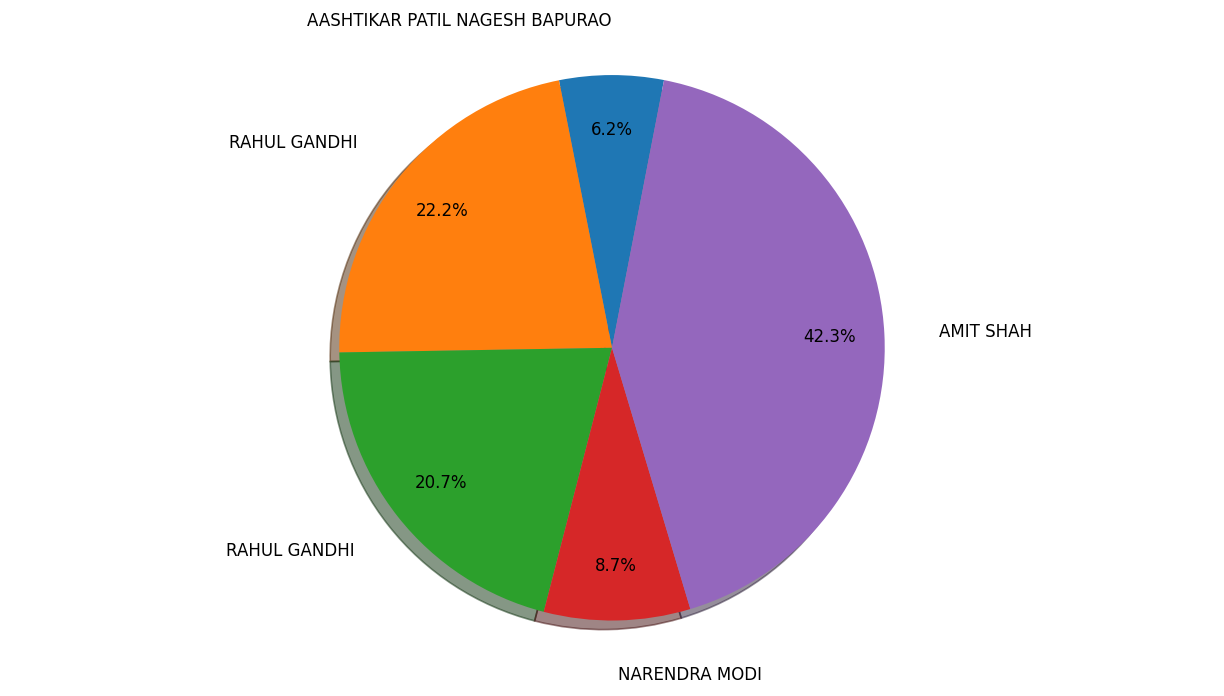

In [214]:
fig1 = plt.figure(dpi = 120,figsize=(10,5))
ax1 = fig1.add_subplot([0,0,1,1])
ax1.pie(df.filtro_total['Margin'],labels=df.filtro_total['Leading Candidate'],autopct='%1.1f%%',shadow = True,startangle=79, pctdistance=0.8,labeldistance=1.2)
ax1.axis('equal')
plt.show()

En el grafico de torta podemos ver el porcentaje de votos de cada uno de los candidatos, es imteresante descubrir en este grafico que el candidato RAHUL GANDHI  competia en dos circunscripciones diferentes

In [215]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [216]:
df_4 = df.groupby(['Leading Party'])[['Margin']].sum().reset_index()
df_4

,Leading Party,Margin
0,AJSU Party,80880
1,Aam Aadmi Party,227517
2,Aazad Samaj Party (Kanshi Ram),151473
3,All India Majlis-E-Ittehadul Muslimeen,338087
4,All India Trinamool Congress,4910963
5,Apna Dal (Soneylal),37810
6,Asom Gana Parishad,222351
7,Bharat Adivasi Party,247054
8,Bharatiya Janata Party,46081536
9,Communist Party of India,334885


In [217]:
filtro_Party = df_4['Margin'] > 3000000
df_5 = df_4[filtro_Party]
df_5

,Leading Party,Margin
4,All India Trinamool Congress,4910963
8,Bharatiya Janata Party,46081536
12,Dravida Munnetra Kazhagam,5081582
15,Indian National Congress,13005922
36,Telugu Desam,3660927


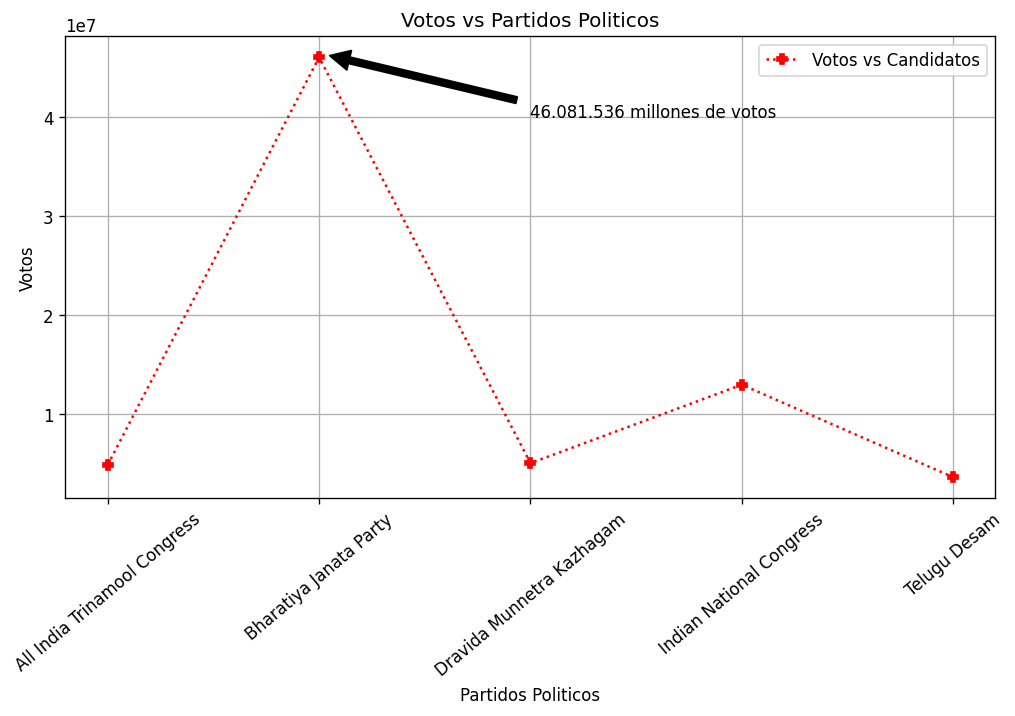

In [218]:
plt.figure(dpi=120,figsize=(10,5))
plt.plot(df_5['Leading Party'],df_5['Margin'],'rP:',label= 'Votos vs Candidatos')
plt.annotate('46.081.536 millones de votos', xy=('Bharatiya Janata Party',46500000), xytext=('Dravida Munnetra Kazhagam',40000000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Partidos Politicos')
plt.ylabel('Votos')
plt.title('Votos vs Partidos Politicos')
plt.legend()
plt.grid(True)
plt.xticks(rotation=40)
plt.show()

En este grafico podemos ver la tendencia de votos de los 5 partidos politicos con mas votacion, el donde podemos ver que tres partidos estan bajo lo 10 millones de votos y un partido sobresale por sobre los 45 millones de votos.

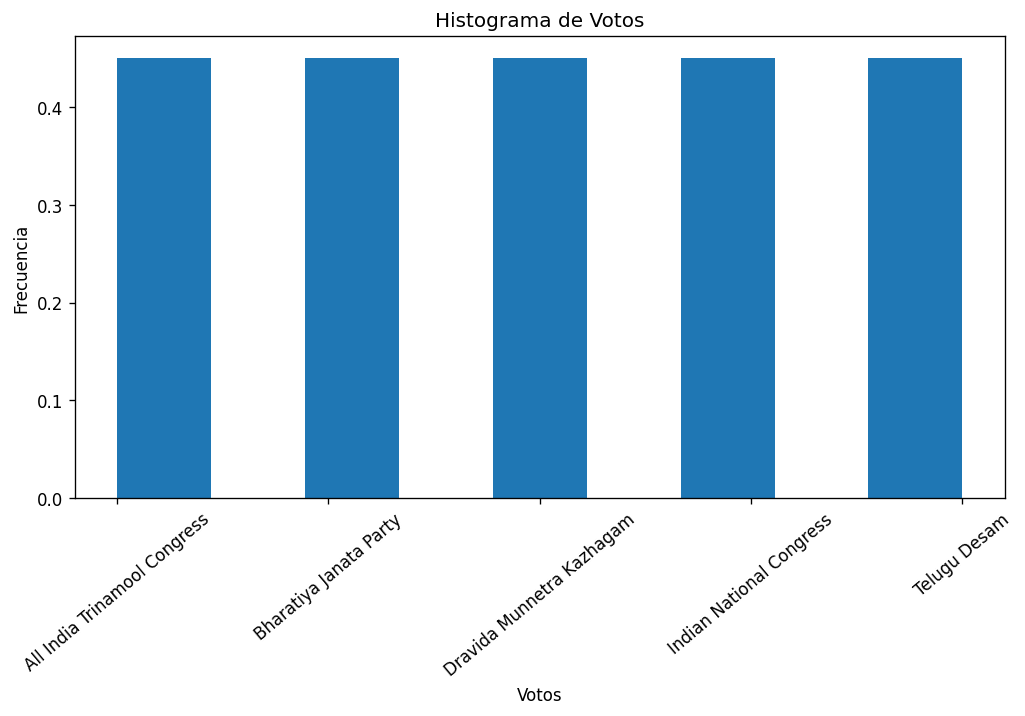

In [219]:
num_bins = 9
fig1 = plt.figure(dpi=120,figsize=(10,5))
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(df_5['Leading Party'],num_bins, density=True,rwidth=1.0)
ax1.set_xlabel('Votos')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Histograma de Votos')
plt.xticks(rotation=40)
plt.show()

En este grafico se intento mostrar un histograma con la frecuencia de los votos de los partidos politicos

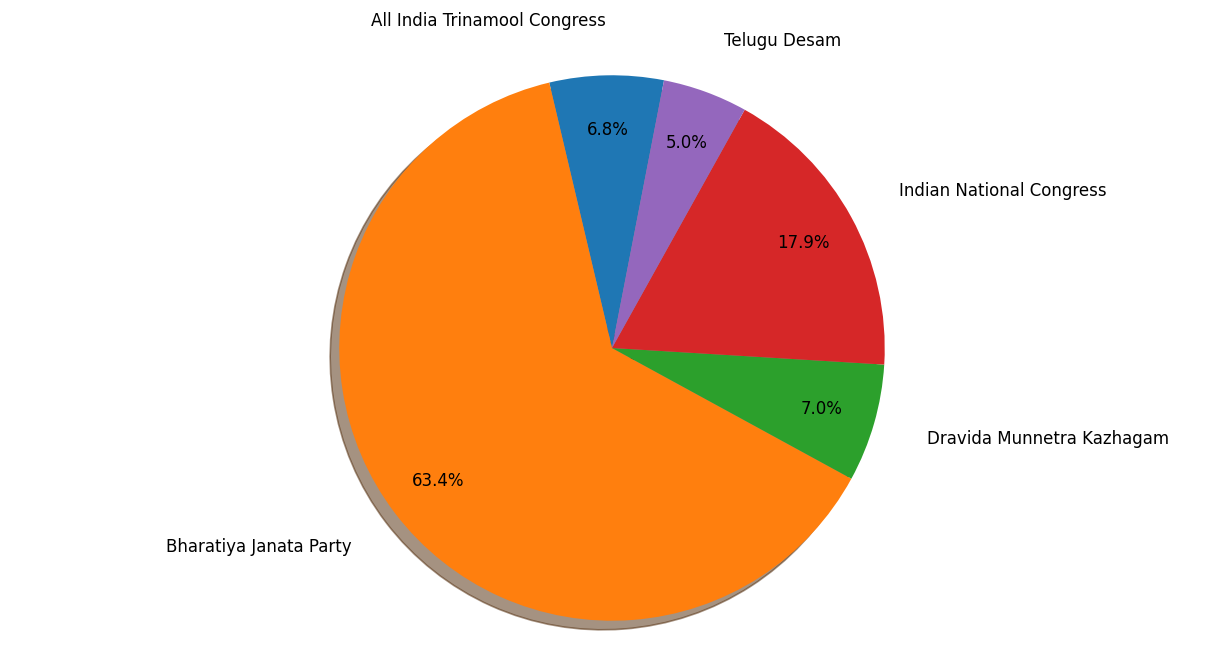

In [220]:
fig1 = plt.figure(dpi = 120,figsize=(10,5))
ax1 = fig1.add_subplot([0,0,1,1])
ax1.pie(df_5['Margin'],labels=df_5['Leading Party'],autopct='%1.1f%%',shadow = True,startangle=79, pctdistance=0.8,labeldistance=1.2)
ax1.axis('equal')
plt.show()

En este grafico podemos ver los 5 partidos mas votados, estos partidos obtuvieron mas de 3 millomes de votos en las elecciones parlamentarias, siendo Bharatiya Janata Party el partido mas votado con un 63.4% , lo que representa mas de 46 millones de votos obtenidos